In [ ]:
!pip install numpy
!pip install pandas
!pip install seaborn
!pip install matplotlib
!pip install scikit-learn
!pip install tensorflow
!pip install scikit-learn==1.0.2


In [ ]:
!pip install scikit-learn==1.0.2


In [ ]:
!pip install numpy pandas seaborn matplotlib scikit-learn tensorflow

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import *
from sklearn.metrics import classification_report


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
image_size = (48, 48)
batch = 32

train = keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/Chess/',
    validation_split=.2,
    subset='training',
    seed=42,
    image_size=image_size,
    batch_size=batch,
    label_mode='categorical'
)

Found 561 files belonging to 6 classes.
Using 449 files for training.


In [ ]:
validation = keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/Chess/',
    validation_split=.2,
    subset='validation',
    seed=42,
    image_size=image_size,
    batch_size=batch,
    label_mode='categorical'
)

Found 561 files belonging to 6 classes.
Using 112 files for validation.


In [ ]:
def display_samples(dataset, n_samples, classes_name):
    plt.figure(figsize=(10, 10))
    for images, labels in dataset.take(1):
        for i in range(n_samples):
            ax = plt.subplot(3, 3, i + 1)
            plt.imshow(images[i].numpy().astype("uint8"))
            plt.title(classes_name[np.argmax(labels[i])])
            plt.axis("off")

(48, 48, 3)


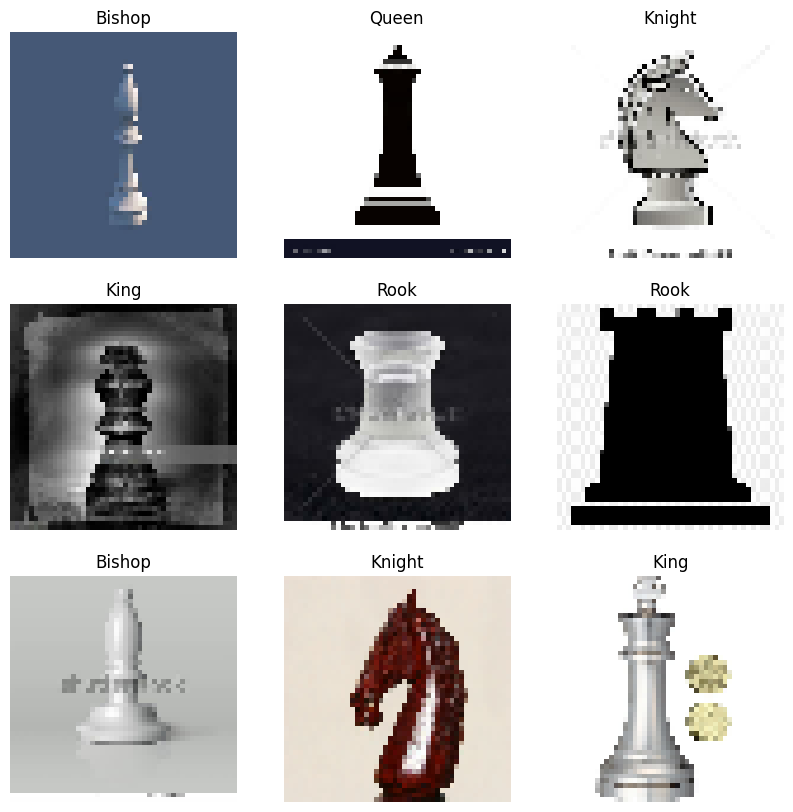

In [ ]:
display_samples(train, 9, train.class_names)
for images, labels in train.take(1):
        for i in range(1):
            print(images[i].shape)

In [ ]:
class_names = train.class_names
labels = np.array([])
for _, label in train:
    labels = np.concatenate((labels, np.argmax(label, axis=-1)))
_, counts = np.unique(labels, return_counts=True)

In [ ]:
counts

array([70, 61, 85, 83, 70, 80])

In [ ]:
input_shape = (image_size[0], image_size[1], 3)
reg = keras.regularizers.l2(0.0005)

model = keras.Sequential()
model.add(Conv2D(32, (3, 3), padding="same", activation="relu", input_shape=image_size + (3,), kernel_regularizer=reg))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(64, (3, 3), padding="same", activation="relu", kernel_regularizer=reg))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(128, (3, 3), padding="same", activation="relu", kernel_regularizer=reg))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(len(train.class_names), activation='softmax'))


model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 48, 48, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 24, 24, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 12, 12, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 6, 6, 128)        

In [ ]:
model.compile(
    loss="categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

epochs = 8
model.fit(
    train,
    epochs=epochs,
    validation_data=validation
);

Epoch 1/8
15/15 [==============================] - 18s 437ms/step - loss: 2.5919 - accuracy: 0.1938 - val_loss: 8.3263 - val_accuracy: 0.1429
Epoch 2/8
15/15 [==============================] - 7s 262ms/step - loss: 2.3348 - accuracy: 0.1938 - val_loss: 4.9695 - val_accuracy: 0.1071
Epoch 3/8
15/15 [==============================] - 9s 383ms/step - loss: 2.0890 - accuracy: 0.1960 - val_loss: 2.7540 - val_accuracy: 0.1607
Epoch 4/8
15/15 [==============================] - 7s 262ms/step - loss: 2.0338 - accuracy: 0.2383 - val_loss: 2.3303 - val_accuracy: 0.2232
Epoch 5/8
15/15 [==============================] - 7s 266ms/step - loss: 2.0683 - accuracy: 0.2383 - val_loss: 4.3451 - val_accuracy: 0.2500
Epoch 6/8
15/15 [==============================] - 8s 262ms/step - loss: 1.9549 - accuracy: 0.2428 - val_loss: 2.8647 - val_accuracy: 0.2321
Epoch 7/8
15/15 [==============================] - 9s 444ms/step - loss: 1.9271 - accuracy: 0.2784 - val_loss: 1.8798 - val_accuracy: 0.2589
Epoch 8/8
15

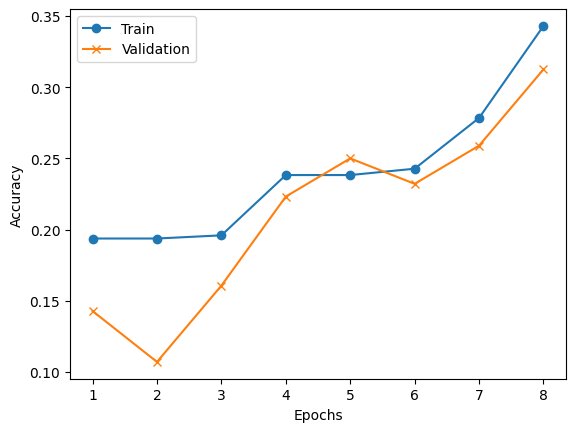

In [ ]:
epochs_range = [i+1 for i in range(epochs)]
plt.plot(epochs_range, model.history.history['accuracy'], '-o', label='Train')
plt.plot(epochs_range, model.history.history['val_accuracy'], '-x',label='Validation')

plt.ylabel('Accuracy')
plt.xlabel('Epochs')

plt.legend()

In [ ]:
y_pred = np.argmax(model.predict(validation), axis=-1)

predictions = np.array([])
labels =  np.array([])
for x, y in validation:
    predictions = np.concatenate([predictions, np.argmax(model.predict(x), axis=-1)])
    labels = np.concatenate([labels, np.argmax(y.numpy(), axis=-1)])

1/1 [==============================] - 0s 201ms/step


<Axes: >

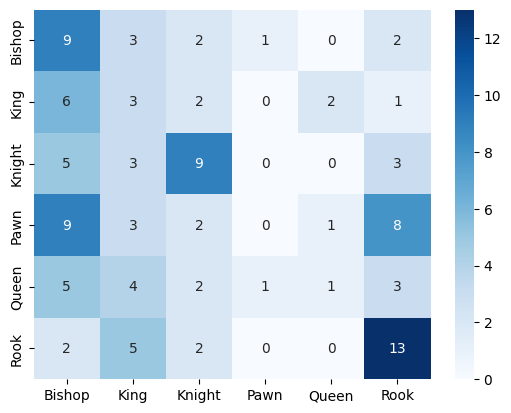

In [ ]:
conf = tf.math.confusion_matrix(labels=labels, predictions=predictions)
sns.heatmap(conf, annot=True, cmap='Blues', yticklabels=class_names, xticklabels=class_names)